In [1]:
#Importing required packages.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline
import random

C:\Users\brian\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#load the data in text form separated by commas
brainT = np.loadtxt('Braintumor.csv', delimiter = ',', skiprows = 1)

In [3]:
#check the shape
print(brainT.shape)

(3762, 14)


In [4]:
#change the format so calculations and reading are easier
np.set_printoptions(formatter = {'float': '{: 0.1f}'.format})

In [5]:
# Shuffle the datasets
import random
brainT 
np.random.shuffle(brainT)
print(brainT)

[[ 0.0  19.9  1166.1 ...  4.0  1.0  0.0]
 [ 0.0  3.5  189.2 ...  3.7  0.9  0.0]
 [ 0.0  10.3  673.7 ...  3.2  1.0  0.0]
 ...
 [ 0.0  12.7  961.4 ...  4.0  1.0  0.0]
 [ 1.0  0.8  164.8 ...  8.6  0.9  0.0]
 [ 0.0  13.5  766.9 ...  3.7  1.0  0.0]]


In [6]:
#Dropping everything below 60% accuracy
brainT = np.delete(brainT, 13, axis = 1)
brainT = np.delete(brainT, 12, axis = 1)
brainT = np.delete(brainT, 11, axis = 1)
brainT = np.delete(brainT, 10, axis = 1)
brainT = np.delete(brainT, 7, axis = 1)
brainT = np.delete(brainT, 6, axis = 1)
brainT = np.delete(brainT, 5, axis = 1)
brainT = np.delete(brainT, 3, axis = 1)
brainT = np.delete(brainT, 2, axis = 1)
brainT = np.delete(brainT, 1, axis = 1)
print(brainT)

[[ 0.0  0.1  0.3  0.1]
 [ 0.0  0.1  0.3  0.1]
 [ 0.0  0.2  0.4  0.2]
 ...
 [ 0.0  0.2  0.4  0.2]
 [ 1.0  0.0  0.1  0.0]
 [ 0.0  0.1  0.3  0.1]]


In [7]:
# Split into training and validation, 30% validation set and 70% training 
index_30percent = int(0.3 * len(brainT[:, 0]))
print(index_30percent)
XVALID = brainT[:index_30percent, 1:]
YVALID = brainT[:index_30percent, :1]
XTRAIN = brainT[index_30percent:, 1:]
YTRAIN = brainT[index_30percent:, :1]

1128


In [8]:
#import tensorflow for neuron netowrk
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint

In [9]:
#build model for Training
model = Sequential()
model.add(Dense(4, input_dim = len(XTRAIN[0, :]), activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

Epoch 1/500
83/83 [==============================] - 2s 12ms/step - loss: 0.7080 - accuracy: 0.2942 - val_loss: 0.6864 - val_accuracy: 0.5452
Epoch 2/500
83/83 [==============================] - 0s 6ms/step - loss: 0.6685 - accuracy: 0.5558 - val_loss: 0.6589 - val_accuracy: 0.5452
Epoch 3/500
83/83 [==============================] - 0s 6ms/step - loss: 0.6499 - accuracy: 0.6014 - val_loss: 0.6436 - val_accuracy: 0.6206
Epoch 4/500
83/83 [==============================] - 0s 6ms/step - loss: 0.6338 - accuracy: 0.6583 - val_loss: 0.6274 - val_accuracy: 0.7996
Epoch 5/500
83/83 [==============================] - 0s 6ms/step - loss: 0.6155 - accuracy: 0.8330 - val_loss: 0.6087 - val_accuracy: 0.8794
Epoch 6/500
83/83 [==============================] - 0s 6ms/step - loss: 0.5964 - accuracy: 0.8694 - val_loss: 0.5892 - val_accuracy: 0.9078
Epoch 7/500
83/83 [==============================] - 0s 6ms/step - loss: 0.5761 - accuracy: 0.9150 - val_loss: 0.5688 - val_accuracy: 0.9229
Epoch 8/500


Epoch 59/500
83/83 [==============================] - 0s 4ms/step - loss: 0.1069 - accuracy: 0.9727 - val_loss: 0.0983 - val_accuracy: 0.9761
Epoch 60/500
83/83 [==============================] - 0s 6ms/step - loss: 0.1066 - accuracy: 0.9734 - val_loss: 0.0978 - val_accuracy: 0.9761
Epoch 61/500
83/83 [==============================] - 0s 5ms/step - loss: 0.1062 - accuracy: 0.9730 - val_loss: 0.0973 - val_accuracy: 0.9761
Epoch 62/500
83/83 [==============================] - 0s 5ms/step - loss: 0.1059 - accuracy: 0.9730 - val_loss: 0.0969 - val_accuracy: 0.9761
Epoch 63/500
83/83 [==============================] - 0s 5ms/step - loss: 0.1055 - accuracy: 0.9734 - val_loss: 0.0965 - val_accuracy: 0.9761
Epoch 64/500
83/83 [==============================] - 0s 6ms/step - loss: 0.1052 - accuracy: 0.9734 - val_loss: 0.0961 - val_accuracy: 0.9761
Epoch 65/500
83/83 [==============================] - 0s 5ms/step - loss: 0.1050 - accuracy: 0.9727 - val_loss: 0.0958 - val_accuracy: 0.9761
Epoch 

83/83 [==============================] - 0s 4ms/step - loss: 0.0985 - accuracy: 0.9730 - val_loss: 0.0885 - val_accuracy: 0.9761
Epoch 117/500
83/83 [==============================] - 0s 4ms/step - loss: 0.0984 - accuracy: 0.9727 - val_loss: 0.0884 - val_accuracy: 0.9761
Epoch 118/500
83/83 [==============================] - 0s 5ms/step - loss: 0.0984 - accuracy: 0.9727 - val_loss: 0.0884 - val_accuracy: 0.9761
Epoch 119/500
83/83 [==============================] - 0s 5ms/step - loss: 0.0983 - accuracy: 0.9734 - val_loss: 0.0882 - val_accuracy: 0.9761
Epoch 120/500
83/83 [==============================] - 1s 6ms/step - loss: 0.0983 - accuracy: 0.9730 - val_loss: 0.0882 - val_accuracy: 0.9761
Epoch 121/500
83/83 [==============================] - 0s 5ms/step - loss: 0.0983 - accuracy: 0.9727 - val_loss: 0.0881 - val_accuracy: 0.9761
Epoch 122/500
83/83 [==============================] - 0s 6ms/step - loss: 0.0983 - accuracy: 0.9727 - val_loss: 0.0881 - val_accuracy: 0.9761
Epoch 123/500

83/83 [==============================] - 0s 5ms/step - loss: 0.0970 - accuracy: 0.9734 - val_loss: 0.0866 - val_accuracy: 0.9761
Epoch 174/500
83/83 [==============================] - 0s 4ms/step - loss: 0.0970 - accuracy: 0.9727 - val_loss: 0.0866 - val_accuracy: 0.9761
Epoch 175/500
83/83 [==============================] - 0s 5ms/step - loss: 0.0969 - accuracy: 0.9730 - val_loss: 0.0866 - val_accuracy: 0.9761
Epoch 176/500
83/83 [==============================] - 0s 5ms/step - loss: 0.0969 - accuracy: 0.9734 - val_loss: 0.0865 - val_accuracy: 0.9761
Epoch 177/500
83/83 [==============================] - 0s 5ms/step - loss: 0.0969 - accuracy: 0.9727 - val_loss: 0.0865 - val_accuracy: 0.9761
Epoch 178/500
83/83 [==============================] - 0s 5ms/step - loss: 0.0969 - accuracy: 0.9730 - val_loss: 0.0865 - val_accuracy: 0.9761
Epoch 179/500
83/83 [==============================] - 0s 5ms/step - loss: 0.0969 - accuracy: 0.9730 - val_loss: 0.0865 - val_accuracy: 0.9761
Epoch 180/500

83/83 [==============================] - 0s 5ms/step - loss: 0.0964 - accuracy: 0.9727 - val_loss: 0.0860 - val_accuracy: 0.9761
Epoch 231/500
83/83 [==============================] - 0s 5ms/step - loss: 0.0964 - accuracy: 0.9727 - val_loss: 0.0860 - val_accuracy: 0.9761
Epoch 232/500
83/83 [==============================] - 0s 6ms/step - loss: 0.0964 - accuracy: 0.9727 - val_loss: 0.0860 - val_accuracy: 0.9761
Epoch 233/500
83/83 [==============================] - 0s 6ms/step - loss: 0.0964 - accuracy: 0.9727 - val_loss: 0.0860 - val_accuracy: 0.9761
Epoch 234/500
83/83 [==============================] - 1s 6ms/step - loss: 0.0964 - accuracy: 0.9727 - val_loss: 0.0860 - val_accuracy: 0.9761
Epoch 235/500
83/83 [==============================] - 1s 6ms/step - loss: 0.0964 - accuracy: 0.9734 - val_loss: 0.0860 - val_accuracy: 0.9761
Epoch 236/500
83/83 [==============================] - 0s 5ms/step - loss: 0.0964 - accuracy: 0.9734 - val_loss: 0.0860 - val_accuracy: 0.9761
Epoch 237/500

83/83 [==============================] - 0s 5ms/step - loss: 0.0961 - accuracy: 0.9727 - val_loss: 0.0858 - val_accuracy: 0.9761
Epoch 288/500
83/83 [==============================] - 0s 5ms/step - loss: 0.0962 - accuracy: 0.9730 - val_loss: 0.0858 - val_accuracy: 0.9761
Epoch 289/500
83/83 [==============================] - 0s 5ms/step - loss: 0.0961 - accuracy: 0.9727 - val_loss: 0.0858 - val_accuracy: 0.9761
Epoch 290/500
83/83 [==============================] - 0s 5ms/step - loss: 0.0961 - accuracy: 0.9734 - val_loss: 0.0858 - val_accuracy: 0.9761
Epoch 291/500
83/83 [==============================] - 0s 5ms/step - loss: 0.0961 - accuracy: 0.9730 - val_loss: 0.0858 - val_accuracy: 0.9761
Epoch 292/500
83/83 [==============================] - 0s 4ms/step - loss: 0.0962 - accuracy: 0.9727 - val_loss: 0.0858 - val_accuracy: 0.9761
Epoch 293/500
83/83 [==============================] - 0s 5ms/step - loss: 0.0961 - accuracy: 0.9730 - val_loss: 0.0858 - val_accuracy: 0.9761
Epoch 294/500

83/83 [==============================] - 0s 5ms/step - loss: 0.0959 - accuracy: 0.9727 - val_loss: 0.0858 - val_accuracy: 0.9761
Epoch 345/500
83/83 [==============================] - 0s 5ms/step - loss: 0.0959 - accuracy: 0.9730 - val_loss: 0.0857 - val_accuracy: 0.9761
Epoch 346/500
83/83 [==============================] - 0s 5ms/step - loss: 0.0959 - accuracy: 0.9730 - val_loss: 0.0858 - val_accuracy: 0.9761
Epoch 347/500
83/83 [==============================] - 0s 5ms/step - loss: 0.0959 - accuracy: 0.9734 - val_loss: 0.0857 - val_accuracy: 0.9761
Epoch 348/500
83/83 [==============================] - 1s 6ms/step - loss: 0.0959 - accuracy: 0.9730 - val_loss: 0.0857 - val_accuracy: 0.9761
Epoch 349/500
83/83 [==============================] - 1s 6ms/step - loss: 0.0959 - accuracy: 0.9727 - val_loss: 0.0857 - val_accuracy: 0.9761
Epoch 350/500
83/83 [==============================] - 1s 8ms/step - loss: 0.0959 - accuracy: 0.9730 - val_loss: 0.0857 - val_accuracy: 0.9761
Epoch 351/500

83/83 [==============================] - 0s 5ms/step - loss: 0.0957 - accuracy: 0.9727 - val_loss: 0.0857 - val_accuracy: 0.9761
Epoch 402/500
83/83 [==============================] - 0s 4ms/step - loss: 0.0957 - accuracy: 0.9734 - val_loss: 0.0857 - val_accuracy: 0.9761
Epoch 403/500
83/83 [==============================] - 0s 4ms/step - loss: 0.0957 - accuracy: 0.9730 - val_loss: 0.0857 - val_accuracy: 0.9761
Epoch 404/500
83/83 [==============================] - 0s 5ms/step - loss: 0.0957 - accuracy: 0.9727 - val_loss: 0.0858 - val_accuracy: 0.9761
Epoch 405/500
83/83 [==============================] - 0s 5ms/step - loss: 0.0956 - accuracy: 0.9734 - val_loss: 0.0858 - val_accuracy: 0.9761
Epoch 406/500
83/83 [==============================] - 0s 4ms/step - loss: 0.0957 - accuracy: 0.9734 - val_loss: 0.0857 - val_accuracy: 0.9761
Epoch 407/500
83/83 [==============================] - 0s 4ms/step - loss: 0.0958 - accuracy: 0.9730 - val_loss: 0.0857 - val_accuracy: 0.9761
Epoch 408/500

83/83 [==============================] - 0s 4ms/step - loss: 0.0956 - accuracy: 0.9727 - val_loss: 0.0857 - val_accuracy: 0.9761
Epoch 459/500
83/83 [==============================] - 0s 5ms/step - loss: 0.0956 - accuracy: 0.9730 - val_loss: 0.0857 - val_accuracy: 0.9761
Epoch 460/500
83/83 [==============================] - 0s 4ms/step - loss: 0.0955 - accuracy: 0.9730 - val_loss: 0.0857 - val_accuracy: 0.9761
Epoch 461/500
83/83 [==============================] - 0s 5ms/step - loss: 0.0956 - accuracy: 0.9734 - val_loss: 0.0857 - val_accuracy: 0.9761
Epoch 462/500
83/83 [==============================] - 0s 5ms/step - loss: 0.0955 - accuracy: 0.9738 - val_loss: 0.0857 - val_accuracy: 0.9761
Epoch 463/500
83/83 [==============================] - 0s 4ms/step - loss: 0.0956 - accuracy: 0.9727 - val_loss: 0.0857 - val_accuracy: 0.9761
Epoch 464/500
83/83 [==============================] - 0s 5ms/step - loss: 0.0955 - accuracy: 0.9734 - val_loss: 0.0857 - val_accuracy: 0.9761
Epoch 465/500

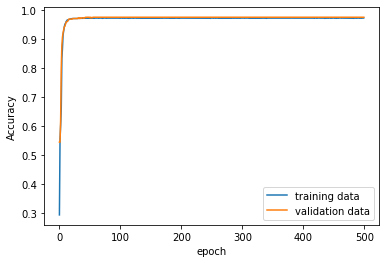

In [10]:
#compile and fit the model with 500 epochs
model.compile(loss = 'binary_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])

checkpoint = ModelCheckpoint('N5check.h5', monitor = 'val_accuracy', save_best_only = True, mode = 'max', verbose = 1)

# Do the training (specify the validation set as well)
history = model.fit(XTRAIN, YTRAIN, validation_data = (XVALID, YVALID), verbose = 1, epochs = 500)

# Check what's in the history
print(history.params)

# Plot the learning curves (loss/accuracy/MAE)
plt.plot(history.history['accuracy']) # replace with accuracy/MAE
plt.plot(history.history['val_accuracy']) # replace with val_accuracy, etc.
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()

In [11]:
accuracy = model.evaluate(XTRAIN, YTRAIN)

83/83 [==============================] - 0s 4ms/step - loss: 0.0953 - accuracy: 0.9727


In [12]:
accuracy = model.evaluate(XVALID, YVALID)

36/36 [==============================] - 0s 4ms/step - loss: 0.0858 - accuracy: 0.9761


In [13]:
print(YTRAIN[:5])
predictions = model.predict(XTRAIN)
print(predictions[:5])

[[ 0.0]
 [ 1.0]
 [ 1.0]
 [ 0.0]
 [ 1.0]]
83/83 [==============================] - 0s 3ms/step
[[ 0.0]
 [ 1.0]
 [ 1.0]
 [ 0.0]
 [ 1.0]]


In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
precision = precision_score(YTRAIN, predictions.round())
print(precision)
recall = recall_score(YTRAIN, predictions.round())
print(recall)
f1 = f1_score(YTRAIN,predictions.round())
print(f1)

0.9875666074600356
0.9504273504273504
0.9686411149825784


In [15]:
print(YVALID[:5])
predictions = model.predict(XVALID)
print(predictions[:5])

[[ 0.0]
 [ 0.0]
 [ 0.0]
 [ 1.0]
 [ 1.0]]
36/36 [==============================] - 0s 5ms/step
[[ 0.0]
 [ 0.0]
 [ 0.0]
 [ 0.2]
 [ 1.0]]


In [16]:
precision = precision_score(YVALID, predictions.round())
print(precision)
recall = recall_score(YVALID, predictions.round())
print(recall)
f1 = f1_score(YVALID,predictions.round())
print(f1)

0.9899193548387096
0.9571150097465887
0.9732408325074331
